In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# unzipping the file
local_zip = '/content/cats_and_dogs_filtered1.zip'
zipref = zipfile.ZipFile(local_zip, 'r')
zipref.extractall('/content')

In [3]:
os.listdir('/content')

['.config',
 'cats_and_dogs_filtered',
 'cats_and_dogs_filtered1.zip',
 'sample_data']

In [4]:
base_dir = '/content/cats_and_dogs_filtered'
os.listdir(base_dir)

['validation', 'train', 'vectorize.py']

In [5]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

print(os.listdir(train_dir))
print(os.listdir(val_dir))

['dogs', 'cats']
['dogs', 'cats']


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

print(train_cats_dir, train_dogs_dir, val_cats_dir, val_dogs_dir, sep = '\n')

/content/cats_and_dogs_filtered/train/cats
/content/cats_and_dogs_filtered/train/dogs
/content/cats_and_dogs_filtered/validation/cats
/content/cats_and_dogs_filtered/validation/dogs


In [7]:
print(os.listdir(train_cats_dir)[:5])
print(os.listdir(train_dogs_dir)[:5])

['cat.2.jpg', 'cat.855.jpg', 'cat.672.jpg', 'cat.408.jpg', 'cat.884.jpg']
['dog.718.jpg', 'dog.680.jpg', 'dog.494.jpg', 'dog.704.jpg', 'dog.254.jpg']


In [8]:
print('Number of training cat images   : ', len(os.listdir(train_cats_dir)))
print('Number of training dog images   : ', len(os.listdir(train_dogs_dir)))
print('Number of validation cat images : ', len(os.listdir(val_cats_dir)))
print('Number of validation dog images : ', len(os.listdir(val_dogs_dir)))

Number of training cat images   :  1000
Number of training dog images   :  1000
Number of validation cat images :  500
Number of validation dog images :  500


(-0.5, 479.5, 358.5, -0.5)

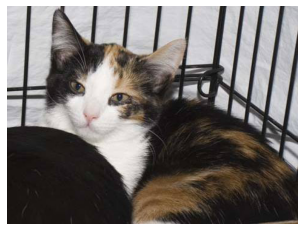

In [9]:
# Visualizing a cat image
cat_image_path = os.path.join(train_cats_dir, 'cat.672.jpg')
cat_image = mpimg.imread(cat_image_path)
plt.imshow(cat_image)
plt.axis('off')

(-0.5, 498.5, 374.5, -0.5)

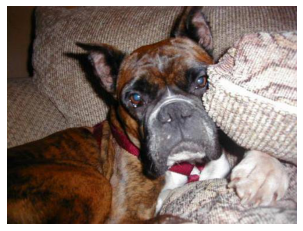

In [10]:
# Visualizing a cat image
dog_image_path = os.path.join(train_dogs_dir, 'dog.704.jpg')
dog_image = mpimg.imread(dog_image_path)
#print(dog_image.shape)
plt.imshow(dog_image)
plt.axis('off')

In [11]:
train_cat_images = os.listdir(train_cats_dir)[:50]
train_dog_images = os.listdir(train_dogs_dir)[:50]

cat_image_paths = [os.path.join(train_cats_dir, image) for image in train_cat_images]
dog_image_paths = [os.path.join(train_dogs_dir, image) for image in train_dog_images]

image_paths = cat_image_paths + dog_image_paths

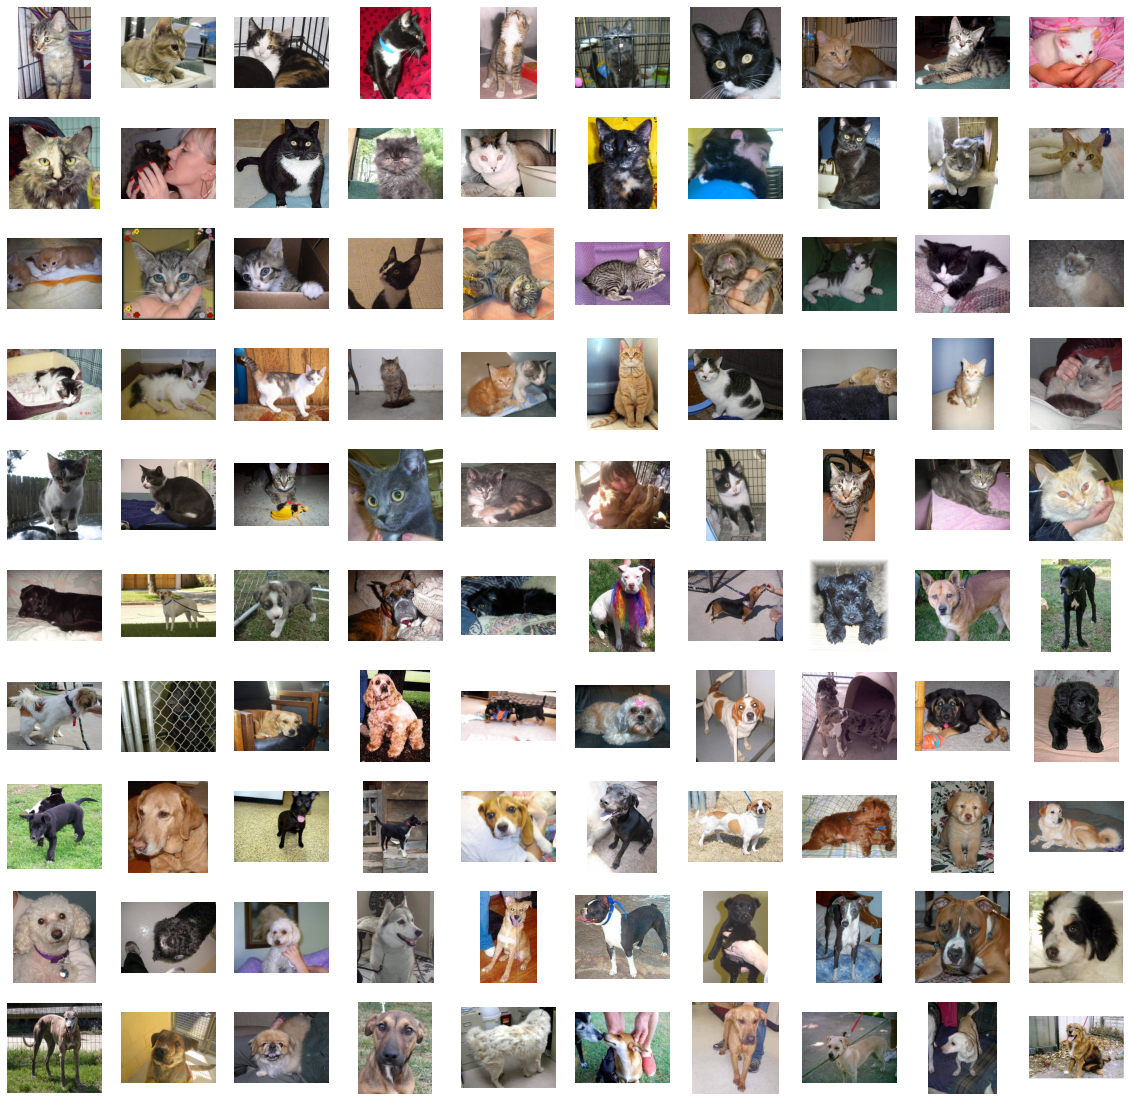

In [12]:
plt.figure(figsize = (20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300,300),
    batch_size = 50,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [16]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (300,300),
    batch_size = 50,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [17]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (300,300,3)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 270000)            0         
                                                                 
 dense (Dense)               (None, 500)               135000500 
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 135,211,201
Trainable params: 135,211,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 40,
    verbose = 1
)

Epoch 1/40
40/40 [==============================] - 191s 5s/step - loss: 20.1521 - accuracy: 0.4885 - val_loss: 1.3772 - val_accuracy: 0.5070
Epoch 2/40
40/40 [==============================] - 182s 5s/step - loss: 4.0493 - accuracy: 0.4940 - val_loss: 1.1196 - val_accuracy: 0.5010
Epoch 3/40
40/40 [==============================] - 193s 5s/step - loss: 2.1956 - accuracy: 0.4980 - val_loss: 1.0320 - val_accuracy: 0.5060
Epoch 4/40
40/40 [==============================] - 178s 4s/step - loss: 1.3484 - accuracy: 0.5175 - val_loss: 1.0402 - val_accuracy: 0.5030
Epoch 5/40
40/40 [==============================] - 183s 5s/step - loss: 0.8540 - accuracy: 0.5285 - val_loss: 0.9070 - val_accuracy: 0.5020
Epoch 6/40
40/40 [==============================] - 195s 5s/step - loss: 0.7886 - accuracy: 0.5360 - val_loss: 0.7278 - val_accuracy: 0.5330
Epoch 7/40
40/40 [==============================] - 181s 4s/step - loss: 0.7357 - accuracy: 0.5450 - val_loss: 0.6748 - val_accuracy: 0.5710
Epoch 8/40
4

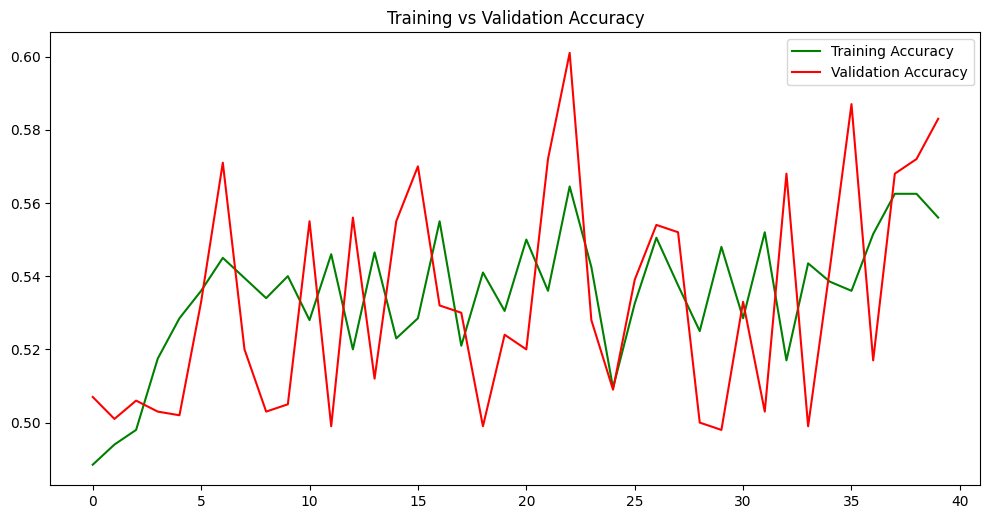

In [20]:
train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']

plt.figure(figsize = (12,6), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

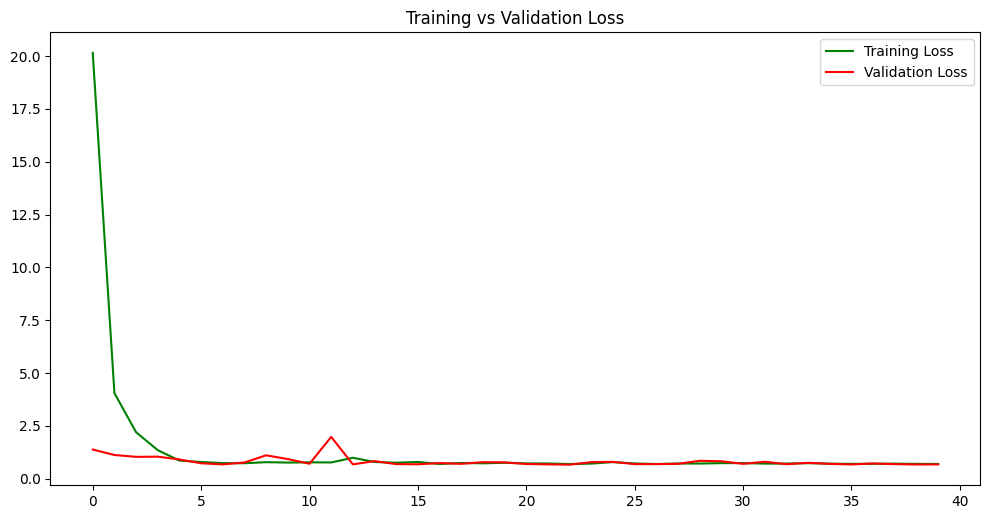

In [21]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

plt.figure(figsize = (12,6), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

In [ ]:
-- Using CNN